In [1]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
pip install --upgrade pip setuptools wheel


In [4]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [7]:
## basic libraries
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
## dividing the dataset into dependent and independent feature
X = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [18]:
## Feature Engineering
## one hot encoded
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [20]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [21]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [23]:
X=pd.concat([X,geography,gender],axis=1)

In [24]:
## Splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
## Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [28]:
X_train.shape

(8000, 11)

In [29]:
## Part 2 let's create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [30]:
## initializing the ANN
classifier = Sequential()

In [31]:
## Adding the input layer
classifier.add(Dense(units=10,activation='relu'))

In [32]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [33]:
## Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [34]:
##Output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [39]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(
    learning_rate=0.01)

In [43]:
## Early stopping
import tensorflow as tf
import keras
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [44]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8750 - loss: 0.3009 - val_accuracy: 0.8489 - val_loss: 0.3617
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8661 - loss: 0.3106 - val_accuracy: 0.8648 - val_loss: 0.3573
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8689 - loss: 0.3092 - val_accuracy: 0.8603 - val_loss: 0.3628
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8666 - loss: 0.3233 - val_accuracy: 0.8576 - val_loss: 0.3623
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8734 - loss: 0.3155 - val_accuracy: 0.8580 - val_loss: 0.3560
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8717 - loss: 0.3013 - val_accuracy: 0.8538 - val_loss: 0.3563
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8716 - loss: 0.3081 - val_accuracy: 0.8629 - val_loss: 0.3608
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8638 - loss: 0.3341 - 

In [45]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

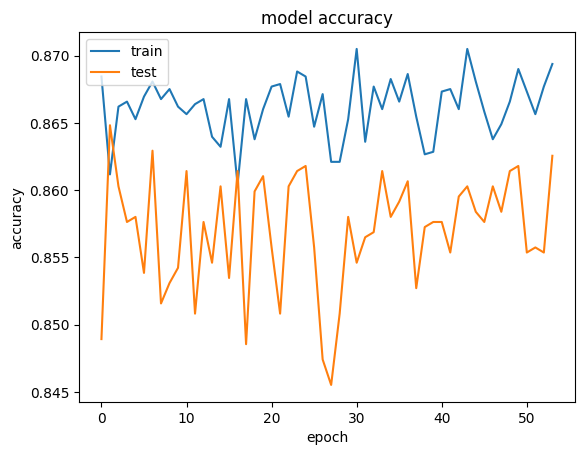

In [46]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

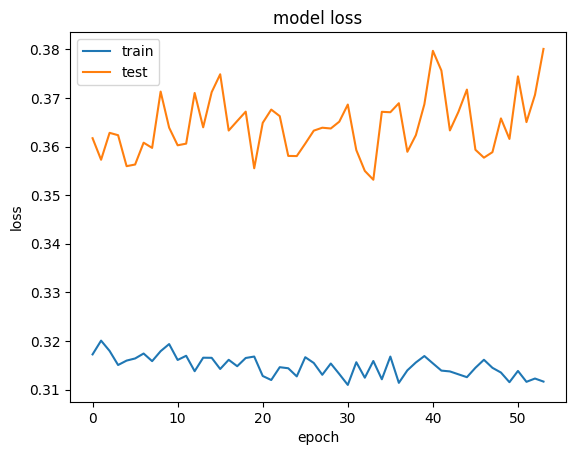

In [47]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()## for loss

In [49]:

## Making the predictions and evaluating the model
## predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [50]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [51]:
cm

array([[1502,   93],
       [ 187,  218]])

In [52]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [53]:
score

0.86

In [54]:
## get the weights
classifier.get_weights()

[array([[-0.10711136, -0.04067604,  0.35663283, -0.0696518 , -1.0464653 ,
          1.3405215 ,  0.5390538 , -1.9082938 ,  0.35282728, -0.01534161],
        [ 4.8627944 ,  1.7151672 ,  0.72607666,  4.1167164 , -1.2592404 ,
         -2.1904843 , -4.458109  , -2.1831818 , -0.88738286,  2.0229676 ],
        [-0.5668665 , -0.330462  ,  0.06004157,  0.14942358,  0.28733888,
         -0.16174185,  1.4639875 ,  0.7898872 , -0.8921197 , -0.18478231],
        [ 0.4145698 ,  1.1064379 , -3.9266262 , -0.9885795 ,  4.499865  ,
         -2.5425074 , -2.813957  , -2.538464  , -0.7488547 , -2.0546606 ],
        [-2.196578  ,  4.9275627 , -5.9428725 , -0.6403126 ,  2.0413904 ,
         -1.2955424 , -0.7233254 ,  1.5506227 , -0.5605454 ,  0.88355136],
        [ 0.12538305, -0.31596696, -0.3181202 , -0.5306908 , -0.53540707,
          0.7634064 , -2.2008402 , -1.0541104 ,  0.986408  ,  0.43061638],
        [-0.7138202 , -0.2770614 ,  0.29652292,  4.9909654 ,  0.29113448,
          1.0040089 ,  1.8075414